## MLSC - Classification Excercise

### About the data set (Bank Client Data)

#### Bank client data:
**age:** Age of the client<br>
**duration:** last contact duration, in seconds.<br> 

#### Other attributes:
**campaign:** number of contacts performed during this campaign and for this client<br>
**pdays:** number of days that passed by after the client was last contacted from a previous campaign (999 means client was not previously contacted)<br>
**previous:** number of contacts performed before this campaign and for this client<br>

#### Social and economic context 

**emp.var.rate:** employment variation rate - quarterly indicator<br>
**cons.price.idx:** consumer price index - monthly indicator<br>
**cons.conf.idx:** consumer confidence index - monthly indicator<br>
**euribor3m:** euribor 3 month rate - daily indicator<br>
**nr.employed:** number of employees - quarterly indicator<br>

**y** - (Output variable) has the client subscribed a term deposit?

# Table of Content

1. Data Preprocessing - **3 Marks**
2. Logistic Regression Model - **3 Marks**
3. Decision Tree Model - **3 Marks**
4. Random Forest Model - **3 Marks**
5. XGBoost Model - **3 Marks**
6. K Nearest Neighbors Model - **3 Marks**
7. Naive Bayes Model - **3 Marks**
8. Compare the Results of all the above mentioned algorithms - **4 Marks**
9. Intrepret your solution based on the results - **5 Marks**


**Group Members**

**1.Ranjith**

**2.Raj Bhaskar**

**3.S.Aishwarya**

<a id="logreg"> </a>
## 1. Data Pre-Processing

**Import the required libraries**

In [1]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import various functions from sklearn 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score

# import function to perform feature selection
from sklearn.feature_selection import RFE

plt.rcParams['figure.figsize'] = [15,8]

#### Load the csv file

In [2]:
df = pd.read_csv("bank.csv")
df.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,32,205,2,999,0,1.100000,93.994000,-36.400000,4.858000,5191.000000,no
1,32,691,10,999,0,1.400000,93.918000,-42.700000,4.960000,5228.100000,yes
2,45,45,8,999,0,1.400000,93.444000,-36.100000,4.963000,5228.100000,no
3,33,400,1,5,2,-1.100000,94.601000,-49.500000,1.032000,4963.600000,yes
4,47,903,2,999,1,-1.800000,93.075000,-47.100000,1.415000,5099.100000,yes


<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Prepare the data </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [3]:
df.dtypes

age                 int64
duration            int64
campaign            int64
pdays               int64
previous            int64
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Perform an analysis for missing values </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [4]:
df.isnull().sum()

age               0
duration          0
campaign          0
pdays             0
previous          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Remove the outliers (if any) </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [5]:
# Define the function to remove outliers for a specific column
def remove_outliers(column):
    Q1 = np.percentile(column, 25)
    Q3 = np.percentile(column, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (column < lower_bound) | (column > upper_bound)
    return column[~outliers]

# Apply the function to each column you want to remove outliers from
columns_to_remove_outliers = ['age', 'duration', 'campaign', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
for column in columns_to_remove_outliers:
    df[column] = remove_outliers(df[column])
    
    # Replace missing values with column mean
df.fillna(df.mean(), inplace=True)

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Separate the dependent and the independent variables. Also, in the target variable, replace yes with 0 and no with 1 </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [6]:
# Import label encoder
from sklearn import preprocessing

# lbl_encoder object knows how to understand word labels.
lbl_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'country'.
df['y']= lbl_encoder.fit_transform(df['y'])
df.head()


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,32.000000,205.000000,2.000000,999,0,1.100000,93.994000,-36.400000,4.858000,5191.000000,0
1,32.000000,691.000000,1.973410,999,0,1.400000,93.918000,-42.700000,4.960000,5228.100000,1
2,45.000000,45.000000,1.973410,999,0,1.400000,93.444000,-36.100000,4.963000,5228.100000,0
3,33.000000,400.000000,1.000000,5,2,-1.100000,94.601000,-49.500000,1.032000,4963.600000,1
4,47.000000,903.000000,2.000000,999,1,-1.800000,93.075000,-47.100000,1.415000,5099.100000,1


In [7]:
# store the target variable 'y' in a dataframe 'df_target'
df_target = df['y']

# store all the independent variables in a dataframe 'df_feature' 
# drop the column 'y' using drop()
# 'axis = 1' drops the specified column
df_feature = df.drop('y', axis = 1)


<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Remove the unnecessary variables that will not contribute to the model. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

<AxesSubplot:>

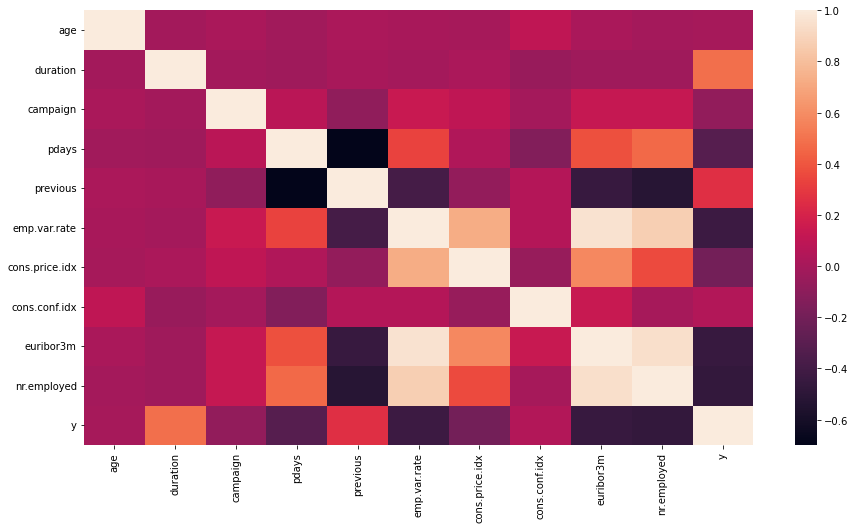

In [8]:
sns.heatmap(df.corr())

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Plot the distribution of all the numeric variables and find the value of skewness for each variable. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

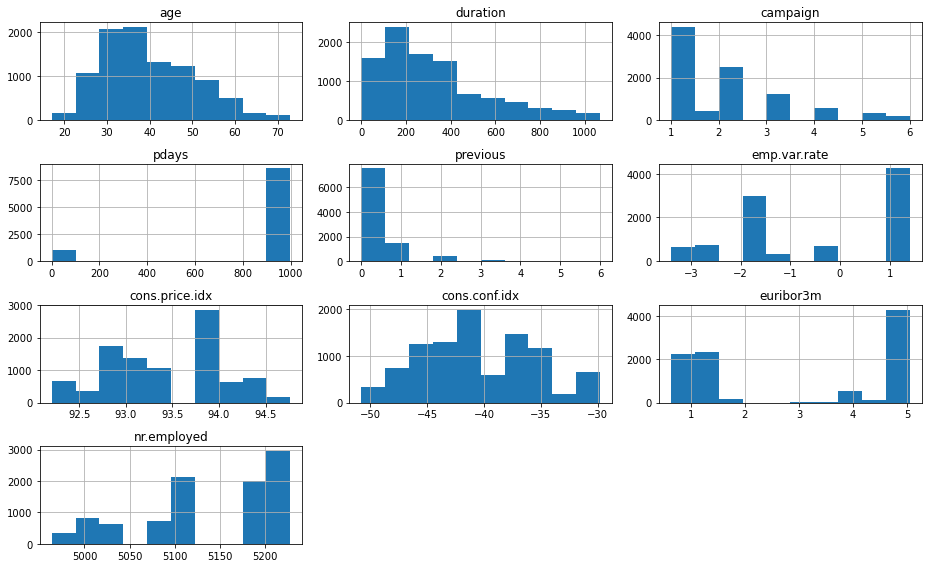

In [9]:
plt.rcParams['figure.figsize'] = [13,8]
df_feature.hist()
plt.tight_layout()
plt.show()

In [10]:
df_feature.skew()

age               0.627993
duration          1.108720
campaign          1.432831
pdays            -2.549356
previous          2.895599
emp.var.rate     -0.181234
cons.price.idx   -0.125216
cons.conf.idx     0.182502
euribor3m        -0.058332
nr.employed      -0.463581
dtype: float64

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Plot the distribution of the target variable.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<AxesSubplot:xlabel='y', ylabel='count'>

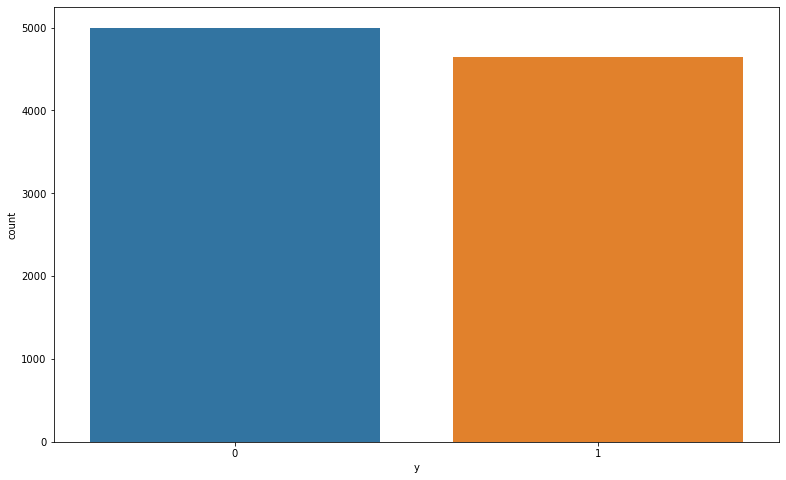

In [11]:
sns.countplot(x = df_target)

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Scale all the numeric variables using standard scalar.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [12]:
# initialize the standard scalar
X_scaler = StandardScaler()

# scale all the numerical columns
# standardize all the columns of the dataframe 'df_num'
num_scaled = X_scaler.fit_transform(df_feature)

# create a dataframe of scaled numerical variables
# pass the required column names to the parameter 'columns'
df_feature_scaled = pd.DataFrame(num_scaled, columns = df_feature.columns)
X = df_feature_scaled

In [13]:
X.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,-0.712827,-0.489236,0.021984,0.345494,-0.447172,0.908285,0.805042,0.846777,0.983194,0.620697
1,-0.712827,1.541496,0.000000,0.345494,-0.447172,1.082931,0.684662,-0.432446,1.037275,1.050379
2,0.511857,-1.157789,0.000000,0.345494,-0.447172,1.082931,-0.066130,0.907692,1.038865,1.050379
3,-0.618620,0.325564,-0.804797,-2.897406,2.474374,-0.372451,1.766500,-1.813195,-1.045350,-2.012985
4,0.700270,2.427330,0.021984,0.345494,1.013601,-0.779958,-0.650607,-1.325872,-0.842284,-0.443662


<a id="logreg"> </a>
## 2. Logistic regression model

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>How does a unit change in each feature influence the odds of a client subscribed a term deposit or not?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [14]:
# add a constant column to the dataframe
# while using the 'Logit' method in the Statsmodels library, the method do not consider the intercept by default
# we can add the intercept to the set of independent variables using 'add_constant()'
X = sm.add_constant(X)

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train, X_test, y_train, y_test = train_test_split(X, df_target, random_state = 10, test_size = 0.2)

# check the dimensions of the train & test subset using 'shape'
# print dimension of train set
print('X_train', X_train.shape)
print('y_train', y_train.shape)

# print dimension of test set
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (7712, 11)
y_train (7712,)
X_test (1928, 11)
y_test (1928,)


In [15]:
# build the model on train data (X_train and y_train)
# use fit() to fit the logistic regression model
logreg = sm.Logit(y_train, X_train).fit()

# print the summary of the model
print(logreg.summary())

Optimization terminated successfully.
         Current function value: 0.398127
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 7712
Model:                          Logit   Df Residuals:                     7701
Method:                           MLE   Df Model:                           10
Date:                Sun, 18 Jun 2023   Pseudo R-squ.:                  0.4251
Time:                        16:52:37   Log-Likelihood:                -3070.4
converged:                       True   LL-Null:                       -5340.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0006      0.034     -0.018      0.986      -0.067       0.066
age              

In [16]:
# take the exponential of the coefficient of a variable to calculate the odds
# 'params' returns the coefficients of all the independent variables
# pass the required column name to the parameter, 'columns'
df_odds = pd.DataFrame(np.exp(logreg.params), columns= ['Odds']) 

# print the dataframe
df_odds

,Odds
const,0.999395
age,0.973034
duration,5.315250
campaign,1.027698
pdays,0.512808
previous,0.820394
emp.var.rate,0.237030
cons.price.idx,1.284496
cons.conf.idx,1.139168
euribor3m,2.209906


Interpretation:

odds_const: The odds of getting an admission is 0.999395, considering all other variables take zero value

odds_age_Score = 0.973034, it implies that the odds of the client subsribing a term deposit increases by a factor of 0.973034 due to one unit increase in the age, keeping other variables constant.

odds_duration_Score = 5.315250, it implies that the odds of the client subsribing a term deposit increases by a factor of 5.315250 due to one unit increase in the last contract duration, keeping other variables constant.

odds_campaign_Score = 1.027698, it implies that the odds of the client subsribing a term deposit increases by a factor of 1.027698 due to one unit increase in the number of contracts performed during this campaign for this client, keeping other variables constant.

odds_pdays_Score = 0.512808, it implies that the odds of the client subsribing a term deposit increases by a factor of 0.512808 due to one unit increase in the number of days that passed after the client was last contacted from previous campaign, keeping other variables constant.

odds_previous_Score = 0.820394, it implies that the odds of the client subsribing a term deposit increases by a factor of 0.820394 due to one unit increase in the last numbers of contacts performed before this campaign for this client, keeping other variables constant.

odds_emp.var.rate_Score = 0.237030, it implies that the odds of the client subsribing a term deposit increases by a factor of 0.237030 due to one unit increase in the employement variation rate, keeping other variables constant.

odds_cons.price.idx_Score = 1.284496, it implies that the odds of the client subsribing a term deposit increases by a factor of 1.284496 due to one unit increase in the last consumer price index, keeping other variables constant.

odds_cons.conf.idx.idx_Score = 1.139168, it implies that the odds of the client subsribing a term deposit increases by a factor of 1.139168 due to one unit increase in the last consumer confidence index, keeping other variables constant.

odds_euribor3m_Score = 2.209906, it implies that the odds of the client subsribing a term deposit increases by a factor of 2.209906 due to one unit increase in the euribor 3 month rate, keeping other variables constant.

odds_nr.employed_Score = 0.410890, it implies that the odds of the client subsribing a term deposit increases by a factor of 0.410890 due to one unit increase in the number of employees, keeping other variables constant.

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Determining optimal threshold</b>
                </font>
            </div>
        </td>
    </tr>
</table> 

In [17]:
# let 'y_pred_prob' be the predicted values of y
y_pred_prob = logreg.predict(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Finding optimal threshold using Youden's Index

# create a dataframe to store the values for false positive rate, true positive rate and threshold
youdens_table = pd.DataFrame({'TPR': tpr,
                             'FPR': fpr,
                             'Threshold': thresholds})

# calculate the difference between TPR and FPR for each threshold and store the values in a new column 'Difference'
youdens_table['Difference'] = youdens_table.TPR - youdens_table.FPR

# sort the dataframe based on the values of difference 
# 'ascending = False' sorts the data in descending order
# 'reset_index' resets the index of the dataframe
# 'drop = True' drops the previous index
youdens_table = youdens_table.sort_values('Difference', ascending = False).reset_index(drop = True)

# print the first five observations
youdens_table.head()

,TPR,FPR,Threshold,Difference
0,0.844492,0.139721,0.472328,0.704772
1,0.855292,0.152695,0.436173,0.702597
2,0.854212,0.151697,0.439212,0.702515
3,0.857451,0.155689,0.425558,0.701763
4,0.854212,0.152695,0.438434,0.701517


In [18]:
# From above we can see that the optiomal threshold is 0.47

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>For the full model, calculate the accuracy manually using the confusion matrix. Consider 0.5 as the probability threshold.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [19]:
# let 'y_pred_prob' be the predicted values of y
y_pred_prob = logreg.predict(X_test)

# convert probabilities to 0 and 1 using 'if_else'
y_pred_logreg = [ 0 if x < 0.5 else 1 for x in y_pred_prob]

y_pred_logreg[0:5]

[1, 0, 0, 0, 0]

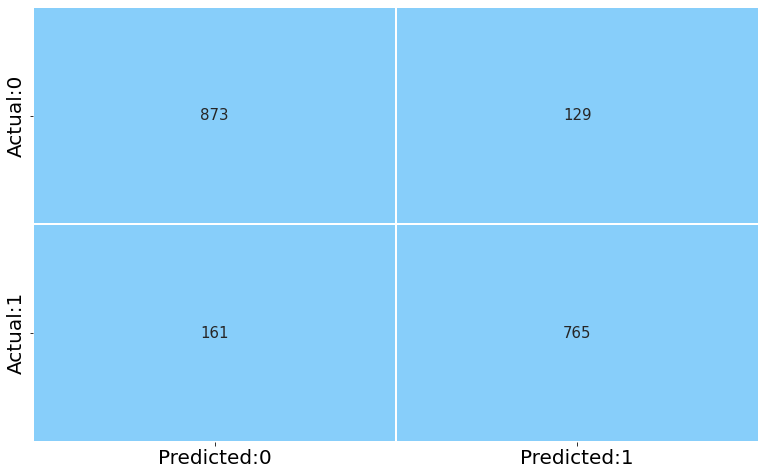

In [20]:
# create a confusion matrix
# pass the actual and predicted target values to the confusion_matrix()
cm = confusion_matrix(y_test, y_pred_logreg)

# label the confusion matrix  
# pass the matrix as 'data'
# pass the required column names to the parameter, 'columns'
# pass the required row names to the parameter, 'index'
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

# plot a heatmap to visualize the confusion matrix
# 'annot' prints the value of each grid 
# 'fmt = d' returns the integer value in each grid
# 'cmap' assigns color to each grid
# as we do not require different colors for each grid in the heatmap,
# use 'ListedColormap' to assign the specified color to the grid
# 'cbar = False' will not return the color bar to the right side of the heatmap
# 'linewidths' assigns the width to the line that divides each grid
# 'annot_kws = {'size':25})' assigns the font size of the annotated text 
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':15})

# set the font size of x-axis ticks using 'fontsize'
plt.xticks(fontsize = 20)

# set the font size of y-axis ticks using 'fontsize'
plt.yticks(fontsize = 20)

plt.rcParams['figure.figsize'] = [8,5]

# display the plot
plt.show()



In [21]:

# True Negatives are denoted by 'TN'
# Actual 'O' values which are classified correctly
TN = cm[0,0]

# True Positives are denoted by 'TP'
# Actual '1' values which are classified correctly
TP = cm[1,1]

# False Positives are denoted by 'FP'
# it is the type 1 error
# Actual 'O' values which are classified wrongly as '1'
FP = cm[0,1]

# False Negatives are denoted by 'FN'
# it is the type 2 error
# Actual '1' values which are classified wrongly as '0'
FN = cm[1,0]

In [22]:
# calculate the accuracy
accuracy = (TN+TP) / (TN+FP+FN+TP)

# print the accuracy
accuracy

0.8495850622406639

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Calculate value of kappa for the full model . Consider threshold value as 0.18</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [23]:
# let 'y_pred_prob' be the predicted values of y
y_pred_for_kappa = logreg.predict(X_test)

# convert probabilities to 0 and 1 using 'if_else'
y_pred_for_kappa1 = [ 0 if x < 0.18 else 1 for x in y_pred_for_kappa]

# compute the kappa value
kappa = cohen_kappa_score(y_test, y_pred_for_kappa1)

# print the kappa value
print('kappa value:',kappa)

kappa value: 0.5605675826732999


<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Calculate the cross entropy for the logistic regression model.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [24]:

# Define the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Calculate cross-entropy loss
def cross_entropy_loss(y_test, y_pred_prob):
    epsilon = 1e-7  # small value to avoid division by zero
    loss = -(y_test * np.log(y_pred_prob + epsilon) + (1 - y_test) * np.log(1 - y_pred_prob + epsilon))
    return np.mean(loss)

# Calculate the cross-entropy loss
loss = cross_entropy_loss(y_test, y_pred_prob)
print("Cross-entropy loss:", loss)

Cross-entropy loss: 0.3729935701589798


<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Predict whether a client subscribed a term deposit or not. For the logistic regression model find the following:<br> <ol type = "a">
                        <li> Precision </li>
                        <li> Recall</li>   
                        <li> F<sub>1</sub> score </li>
                        </ol>
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [25]:
# calculate the precision value
precision = TP / (TP+FP)

# print the value
precision

0.8557046979865772

In [26]:
# calculate the recall value
recall = TP / (TP+FN)

# print the value
recall

0.826133909287257

In [27]:
# calculate the specificity value
specificity = TN / (TN+FP)

# print the value
specificity

0.8712574850299402

In [28]:
# calculate the f1_score
f1_score = 2*((precision*recall)/(precision+recall))

# print the f1_score
f1_score

0.8406593406593408

## 3.Build a Decision Tree model and generate a classification report.



In [29]:
# Fitting Decision Tree Regression to the dataset
from sklearn.tree import DecisionTreeClassifier
regressor = DecisionTreeClassifier()
from sklearn.metrics import classification_report

In [30]:

X_dt = df_feature
Y_dt = df_target

# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_dt, Y_dt, test_size=0.2, random_state=42)

# Train a decision tree classifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, Y_train)

# Predict the labels for the test set
y_pred = classifier.predict(X_test)

y_pred[0:5]

array([0, 0, 1, 0, 0])

In [31]:
# Generate the classification report
report = classification_report(Y_test, y_pred)

print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1004
           1       0.83      0.84      0.84       924

    accuracy                           0.84      1928
   macro avg       0.84      0.84      0.84      1928
weighted avg       0.85      0.84      0.84      1928



<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Determining optimal hyperparameters using GridSearchCV</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [32]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [5, 6, 7, 8, 9],
              'criterion' :['gini', 'entropy']
             }
tree_clas = DecisionTreeClassifier(random_state=1024)
grid_search = GridSearchCV(estimator=tree_clas, param_grid=param_grid, cv=5, verbose=True)
grid_search.fit(X_train, Y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1024),
             param_grid={'ccp_alpha': [0.1, 0.01, 0.001],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8, 9],
                         'max_features': ['auto', 'sqrt', 'log2']},
             verbose=True)

In [33]:
final_model = grid_search.best_estimator_
final_model

DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=9,
                       max_features='auto', random_state=1024)

In [34]:
# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_dt, Y_dt, test_size=0.2, random_state=42)

# Train a decision tree classifier after optimised parameter
classifier_optimal = DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=9,
                       max_features='auto', random_state=1024)
classifier_optimal.fit(X_train, Y_train)

# Predict the labels for the test set
y_pred_dt_optimal = classifier_optimal.predict(X_test)

y_pred_dt_optimal[0:5]

array([0, 0, 1, 0, 0])

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Compare the Full model and optimized model using model performance metrics
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [35]:
# Generate the classification report
report = classification_report(Y_test, y_pred)

print("Classification Report before giving optimal parameters:")
print(report)

Classification Report before giving optimal parameters:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1004
           1       0.83      0.84      0.84       924

    accuracy                           0.84      1928
   macro avg       0.84      0.84      0.84      1928
weighted avg       0.85      0.84      0.84      1928



In [36]:
# Generate the classification report
report_optimal = classification_report(Y_test, y_pred_dt_optimal)

print("Classification Report after giving optimal parameters:")
print(report_optimal)

Classification Report after giving optimal parameters:
              precision    recall  f1-score   support

           0       0.87      0.81      0.84      1004
           1       0.81      0.87      0.84       924

    accuracy                           0.84      1928
   macro avg       0.84      0.84      0.84      1928
weighted avg       0.84      0.84      0.84      1928



In [37]:
# We can see that the precision for class 0 has increased and recall for class 0 has decreased which is preferable.
# But for class 1, the precision has decreased and recall increased which is not preferable.

## 4.Build a Random Forest model with n_estimators=30 and generate a classification report.



In [74]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
scores = cross_val_score(RandomForestClassifier(n_estimators=30), X, df_target, cv=5)
print(scores)
print(scores.mean())

[0.87914938 0.87811203 0.87759336 0.87759336 0.87136929]
0.8767634854771785


<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Determining optimal hyperparameters using GridSearchCV</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [39]:
# Below code for GridSearchCV is taking too long to compute. Hence made these as Markdown cells.

from sklearn.model_selection import GridSearchCV
tuned_parameters = [{'criterion': ['entropy', 'gini'],
                    'n_estimators': [10,30,50,70,90],
                    'max_depth': [10,15,20],
                    'max_features': ['sqrt', 'log2'],
                    'min_samples_split': [2,5,8,11],
                    'min_samples_leaf': [1,5,9],
                    'max_leaf_nodes': [2,5,8,11]}]

rf = RandomForestClassifier(random_state=10)
rf_grid = GridSearchCV(estimator = rf, param_grid = tuned_parameters, cv=5)
rf_grid_model = rf_grid.fit(X_train, Y_train)
print('Best parameters for random forest classifier:', rf_grid_model.best_params_, '\n')

rf_model = RandomForestClassifier(criterion = rf_grid_model.best_params_.get('criterion'), 
                                 n_estimators = rf_grid_model.best_params_.get('n_estimators'),
                                 max_depth = rf_grid_model.best_params_.get('max_depth'),
                                 max_features = rf_grid_model.best_params_.get('max_features'),
                                 max_leaf_nodes = rf_grid_model.best_params_.get('max_leaf_node'),
                                 min_samples_leaf = rf_grid_model.best_params_.get('min_samples_leaf'),
                                 min_samples_split = rf_grid_model.best_params_.get('min_samples_split'),
                                 random_state = 10)
rf_model=rf_model.fit(X_train, Y_train)
scores = cross_val_score(rf_model, X, y, cv=5) # X is scaled value
scores.mean()

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Compare the Full model and optimized model using model performance metrics
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

from sklearn.metrics import classification_report
y_pred_rf_before=rf_model.predict(X_test)
clf_report = pd.DataFrame(classification_report(Y_test, y_pred_rf_before, output_dict=True))

from sklearn.metrics import classification_report
y_pred_rf_after=rf_model.predict(X_test)
clf_report = pd.DataFrame(classification_report(Y_test, y_pred_rf_after, output_dict=True))

## 5.Build the XGBoost model with a learning rate of 0.4 and gamma equal to 3. Calculate the accuracy by plotting the confusion matrix

In [40]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [41]:
import xgboost as xgb

# Assuming you have your training data and labels stored in X_train and y_train, respectively

# Create DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train, label=Y_train)

# Set XGBoost parameters
params = {
    'learning_rate': 0.4,
    'gamma': 3
}

# Train the XGBoost model
model = xgb.train(params, dtrain)

# Once the model is trained, you can use it for prediction or evaluation
# For example, if you have a test dataset X_test, you can predict the labels using:
dtest = xgb.DMatrix(X_test)
y_pred_xgb = model.predict(dtest)
y_pred_xgb[0:5]

array([0.01264488, 0.0387252 , 0.845164  , 0.01739741, 0.01264488],
      dtype=float32)

In [42]:
y_pred_xgb_binary = [1 if p >= 0.5 else 0 for p in y_pred_xgb]

# Generate the confusion matrix
cm = confusion_matrix(Y_test, y_pred_xgb_binary)
print(cm)

[[853 151]
 [ 63 861]]


In [43]:

# True Negatives are denoted by 'TN'
# Actual 'O' values which are classified correctly
TN = cm[0,0]

# True Positives are denoted by 'TP'
# Actual '1' values which are classified correctly
TP = cm[1,1]

# False Positives are denoted by 'FP'
# it is the type 1 error
# Actual 'O' values which are classified wrongly as '1'
FP = cm[0,1]

# False Negatives are denoted by 'FN'
# it is the type 2 error
# Actual '1' values which are classified wrongly as '0'
FN = cm[1,0]


# calculate the accuracy
accuracy = (TN+TP) / (TN+FP+FN+TP)

# print the accuracy
accuracy

0.8890041493775933

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Determining optimal hyperparameters using GridSearchCV</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [44]:
# Create the XGBoost classifier
xgb_model = xgb.XGBClassifier()

# Define the parameter grid for GridSearchCV
param_grid = {
    'learning_rate': [0.1, 0.2, 0.3],
    'max_depth': [3, 4, 5],
    'n_estimators': [50, 100, 200]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, Y_train)
# Print the best parameters and best score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'learning_rate': 0.3, 'max_depth': 4, 'n_estimators': 50}
Best score:  0.8866695825583267


<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Compare the Full model and optimized model using model performance metrics
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [45]:
dtrain = xgb.DMatrix(X_train, label=Y_train)

# Set XGBoost parameters
params = {
    'learning_rate': 0.3,
    'gamma': 4,
    'n_estimators' : 50
}

# Train the XGBoost model
model_optimised = xgb.train(params, dtrain)

# Once the model is trained, you can use it for prediction or evaluation
# For example, if you have a test dataset X_test, you can predict the labels using:
dtest = xgb.DMatrix(X_test)
y_pred_xgb_optimised = model_optimised.predict(dtest)

[16:53:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "n_estimators" } are not used.



In [46]:
y_pred_xgb_binary_optimised = [1 if p >= 0.5 else 0 for p in y_pred_xgb_optimised]

# Generate the confusion matrix
cm = confusion_matrix(Y_test, y_pred_xgb_binary_optimised)
print(cm)


# True Negatives are denoted by 'TN'
# Actual 'O' values which are classified correctly
TN = cm[0,0]

# True Positives are denoted by 'TP'
# Actual '1' values which are classified correctly
TP = cm[1,1]

# False Positives are denoted by 'FP'
# it is the type 1 error
# Actual 'O' values which are classified wrongly as '1'
FP = cm[0,1]

# False Negatives are denoted by 'FN'
# it is the type 2 error
# Actual '1' values which are classified wrongly as '0'
FN = cm[1,0]


# calculate the accuracy
accuracy = (TN+TP) / (TN+FP+FN+TP)

# print the accuracy
accuracy

[[843 161]
 [ 59 865]]


0.8858921161825726

In [47]:
# Before optimising the model had 88.6 % accuracy. 
# After optimising the model has 88.5 % accuracy.
# Hence optimisation is not needed here.

## 6.Build the K - Nearest Neighbor Model

In [48]:
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN classifier
knn = KNeighborsClassifier(n_neighbors=2)  # Set the number of neighbors

# Train the KNN classifier
knn.fit(X_train, Y_train)

# Predict labels for the test set
y_pred_knn = knn.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(Y_test, y_pred_knn)
print("Accuracy:", accuracy)

Accuracy: 0.7971991701244814


<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Determining optimal K-Value using Elbow Curve Method</b>
                </font>
            </div>
        </td>
    </tr>
</table>

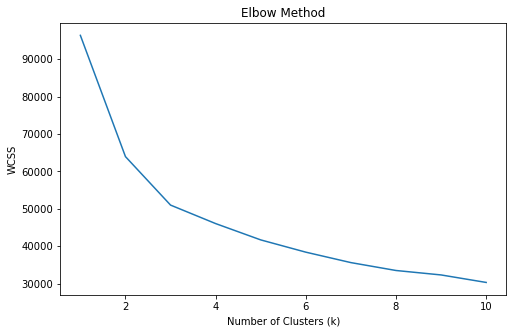

In [49]:
from sklearn.cluster import KMeans
wcss = []

# Perform K-means clustering for different values of k
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plotting the WCSS values
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

In [50]:
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN classifier
knn_elbow = KNeighborsClassifier(n_neighbors=3)  # 3 is taken from elbow method

# Train the KNN classifier
knn_elbow.fit(X_train, Y_train)

# Predict labels for the test set
y_pred_knn_elbow = knn_elbow.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(Y_test, y_pred_knn_elbow)
print("Accuracy:", accuracy)

Accuracy: 0.850103734439834


<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Compare the Full model and optimized model using model performance metrics
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [51]:
# Before optimising the accuracy was 79.71 %.
# After optimising the accuracy is 85.01 %.

## 7. Build the Naive Bayes Model

In [52]:
from sklearn.naive_bayes import GaussianNB

# Create a Gaussian Naive Bayes classifier
nb_gaussian = GaussianNB()

# Train the Naive Bayes classifier
nb_gaussian.fit(X_train, Y_train)

# Predict labels for the test set
y_pred_gaussian = nb_gaussian.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(Y_test, y_pred_gaussian)
print("Accuracy of Gaussian:", accuracy)

Accuracy of Gaussian: 0.7551867219917012


<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Compare the classification results of Gaussian, Bernoulli and Multinomial Naive Bayes</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [53]:
from sklearn.naive_bayes import BernoulliNB

# Create a Bernoulli Naive Bayes classifier
nb_bern = BernoulliNB()

# Train the Naive Bayes classifier
nb_bern.fit(X_train, Y_train)

# Predict labels for the test set
y_pred_bern = nb_bern.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(Y_test, y_pred_bern)
print("Accuracy of Bernoulli:", accuracy)

Accuracy of Bernoulli: 0.6794605809128631


In [56]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.metrics import accuracy_score

# Discretize the numerical features into bins
n_bins = 5
discretizer = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='uniform')
X_discretized = discretizer.fit_transform(df_feature)

# Split the dataset into training and testing sets
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X_discretized, df_target, test_size=0.2, random_state=42)

# Train Multinomial Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train1, Y_train1)

# Make predictions on the test set
y_pred_multi = nb_classifier.predict(X_test1)

# Calculate accuracy
accuracy = accuracy_score(Y_test1, y_pred_multi)
print("Accuracy:", accuracy)

Accuracy: 0.7769709543568465


## 8. Compare the results of all above mentioned algorithms 

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Compare all the classification models using model performance evaluation metrics
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [57]:
# All model accuracies are displayed below

# Logistic regression model
print("The Accuracy of Logistic Regression model is 0.8495850622406639")

# Decision Tree model
print("The Accuracy of Decision Tree model is 0.8386929460580913")

# Random forest

# xgb 
print("The Accuracy of XGBoost model is 88.6")

# Knearest
print("The Accuracy of KNN model is 85.01")

# Gaussian Naive Bayes
print("The Accuracy of Gaussian Naive Bayes model is 75.51")

# Bernoulli 
print("The Accuracy of Bernoulli Naive Bayes model is 67.94")

# Multinomial
print("The Accuracy of Multinomial Naive Bayes model is 77.69 ") 

The Accuracy of Logistic Regression model is 0.8495850622406639
The Accuracy of Decision Tree model is 0.8386929460580913
The Accuracy of XGBoost model is 88.6
The Accuracy of KNN model is 85.01
The Accuracy of Gaussian Naive Bayes model is 75.51
The Accuracy of Bernoulli Naive Bayes model is 67.94
The Accuracy of Multinomial Naive Bayes model is 77.69 


<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Compare all the classification models using their ROC curves.
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

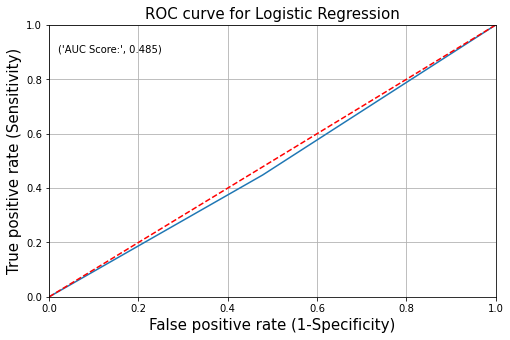

In [58]:
# the roc_curve() returns the values for false positive rate, true positive rate and threshold
# pass the actual target values and predicted probabilities to the function
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_logreg)

# plot the ROC curve
plt.plot(fpr, tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('ROC curve for Logistic Regression', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

# add the AUC score to the plot
# 'x' and 'y' gives position of the text
# 's' is the text 
# use round() to round-off the AUC score upto 4 digits
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(Y_test, y_pred_logreg),4)))
                               
# plot the grid
plt.grid(True)

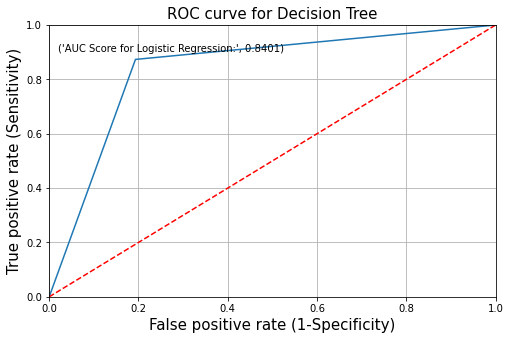

In [59]:
# the roc_curve() returns the values for false positive rate, true positive rate and threshold
# pass the actual target values and predicted probabilities to the function
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_dt_optimal)

# plot the ROC curve
plt.plot(fpr, tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('ROC curve for Decision Tree', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

# add the AUC score to the plot
# 'x' and 'y' gives position of the text
# 's' is the text 
# use round() to round-off the AUC score upto 4 digits
plt.text(x = 0.02, y = 0.9, s = ('AUC Score for Logistic Regression:', round(metrics.roc_auc_score(Y_test, y_pred_dt_optimal),4)))
                               
# plot the grid
plt.grid(True)

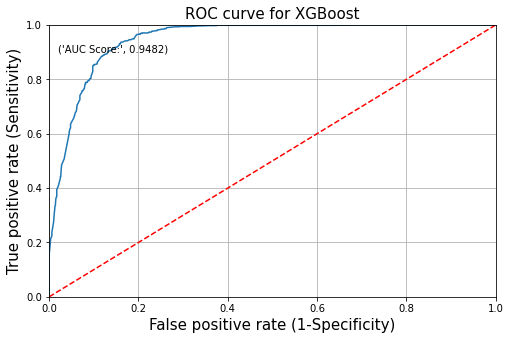

In [60]:
# the roc_curve() returns the values for false positive rate, true positive rate and threshold
# pass the actual target values and predicted probabilities to the function
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_xgb_optimised)

# plot the ROC curve
plt.plot(fpr, tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('ROC curve for XGBoost', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

# add the AUC score to the plot
# 'x' and 'y' gives position of the text
# 's' is the text 
# use round() to round-off the AUC score upto 4 digits
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(Y_test, y_pred_xgb_optimised),4)))
                               
# plot the grid
plt.grid(True)

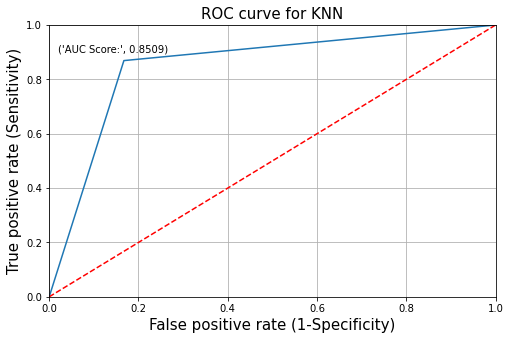

In [61]:
# the roc_curve() returns the values for false positive rate, true positive rate and threshold
# pass the actual target values and predicted probabilities to the function
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_knn_elbow)

# plot the ROC curve
plt.plot(fpr, tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('ROC curve for KNN', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

# add the AUC score to the plot
# 'x' and 'y' gives position of the text
# 's' is the text 
# use round() to round-off the AUC score upto 4 digits
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(Y_test, y_pred_knn_elbow),4)))
                               
# plot the grid
plt.grid(True)

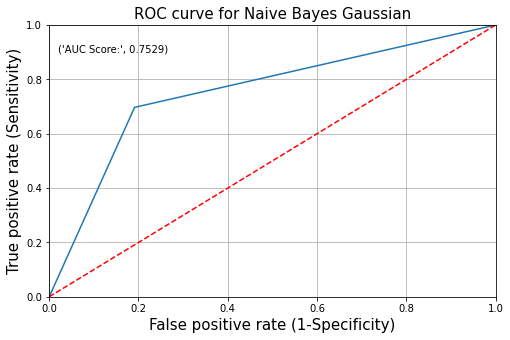

In [62]:
# the roc_curve() returns the values for false positive rate, true positive rate and threshold
# pass the actual target values and predicted probabilities to the function
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_gaussian)

# plot the ROC curve
plt.plot(fpr, tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('ROC curve for Naive Bayes Gaussian', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

# add the AUC score to the plot
# 'x' and 'y' gives position of the text
# 's' is the text 
# use round() to round-off the AUC score upto 4 digits
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(Y_test, y_pred_gaussian),4)))
                               
# plot the grid
plt.grid(True)

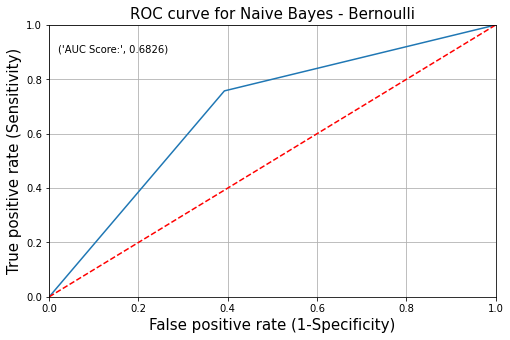

In [63]:
# the roc_curve() returns the values for false positive rate, true positive rate and threshold
# pass the actual target values and predicted probabilities to the function
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_bern)

# plot the ROC curve
plt.plot(fpr, tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('ROC curve for Naive Bayes - Bernoulli', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

# add the AUC score to the plot
# 'x' and 'y' gives position of the text
# 's' is the text 
# use round() to round-off the AUC score upto 4 digits
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(Y_test, y_pred_bern),4)))
                               
# plot the grid
plt.grid(True)

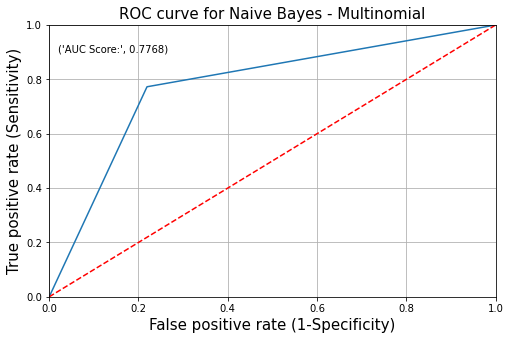

In [64]:
# the roc_curve() returns the values for false positive rate, true positive rate and threshold
# pass the actual target values and predicted probabilities to the function
fpr, tpr, thresholds = roc_curve(Y_test1, y_pred_multi)

# plot the ROC curve
plt.plot(fpr, tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('ROC curve for Naive Bayes - Multinomial', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

# add the AUC score to the plot
# 'x' and 'y' gives position of the text
# 's' is the text 
# use round() to round-off the AUC score upto 4 digits
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(Y_test1, y_pred_multi),4)))
                               
# plot the grid
plt.grid(True)

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>comput cross entropy and Compare all the classification models.
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [65]:

# Define the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Calculate cross-entropy loss
def cross_entropy_loss(Y_test, y_pred_prob):
    epsilon = 1e-7  # small value to avoid division by zero
    loss = -(Y_test * np.log(y_pred_prob + epsilon) + (1 - Y_test) * np.log(1 - y_pred_prob + epsilon))
    return np.mean(loss)

# Calculate the cross-entropy loss
loss = cross_entropy_loss(Y_test, y_pred_prob)
print("Cross-entropy loss for Logistic Regression:", loss)

Cross-entropy loss for Logistic Regression: 0.37599934602777907


In [66]:

# Define the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Calculate cross-entropy loss
def cross_entropy_loss(Y_test, y_pred_dt_optimal):
    epsilon = 1e-7  # small value to avoid division by zero
    loss = -(Y_test * np.log(y_pred_dt_optimal + epsilon) + (1 - Y_test) * np.log(1 - y_pred_dt_optimal + epsilon))
    return np.mean(loss)

# Calculate the cross-entropy loss
loss = cross_entropy_loss(Y_test, y_pred_dt_optimal)
print("Cross-entropy loss for Decision Tree:", loss)

Cross-entropy loss for Decision Tree: 2.5999624407407387


In [67]:

# Define the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Calculate cross-entropy loss
def cross_entropy_loss(Y_test, y_pred_xgb_optimisedl):
    epsilon = 1e-7  # small value to avoid division by zero
    loss = -(Y_test * np.log(y_pred_xgb_optimised + epsilon) + (1 - Y_test) * np.log(1 - y_pred_xgb_optimised + epsilon))
    return np.mean(loss)

# Calculate the cross-entropy loss
loss = cross_entropy_loss(Y_test, y_pred_xgb_optimised)
print("Cross-entropy loss for XGBoost:", loss)

Cross-entropy loss for XGBoost: 0.2908955259863055


In [68]:

# Define the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Calculate cross-entropy loss
def cross_entropy_loss(Y_test, y_pred_knn_elbow):
    epsilon = 1e-7  # small value to avoid division by zero
    loss = -(Y_test * np.log(y_pred_knn_elbow + epsilon) + (1 - Y_test) * np.log(1 - y_pred_knn_elbow + epsilon))
    return np.mean(loss)

# Calculate the cross-entropy loss
loss = cross_entropy_loss(Y_test, y_pred_knn_elbow)
print("Cross-entropy loss for KNN:", loss)

Cross-entropy loss for KNN: 2.4160422610098884


In [69]:

# Define the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Calculate cross-entropy loss
def cross_entropy_loss(Y_test, y_pred_gaussian):
    epsilon = 1e-7  # small value to avoid division by zero
    loss = -(Y_test * np.log(y_pred_gaussian + epsilon) + (1 - Y_test) * np.log(1 - y_pred_gaussian + epsilon))
    return np.mean(loss)

# Calculate the cross-entropy loss
loss = cross_entropy_loss(Y_test, y_pred_gaussian)
print("Cross-entropy loss for Naive Bayes Gaussian:", loss)

Cross-entropy loss for Naive Bayes Gaussian: 3.94592375604377


In [70]:

# Define the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Calculate cross-entropy loss
def cross_entropy_loss(Y_test, y_pred_bern):
    epsilon = 1e-7  # small value to avoid division by zero
    loss = -(Y_test * np.log(y_pred_bern + epsilon) + (1 - Y_test) * np.log(1 - y_pred_bern + epsilon))
    return np.mean(loss)

# Calculate the cross-entropy loss
loss = cross_entropy_loss(Y_test, y_pred_bern)
print("Cross-entropy loss for Naive Bayes Bernoulli:", loss)

Cross-entropy loss for Naive Bayes Bernoulli: 5.166484948802903


In [71]:

# Define the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Calculate cross-entropy loss
def cross_entropy_loss(Y_test1, y_pred_multi):
    epsilon = 1e-7  # small value to avoid division by zero
    loss = -(Y_test1 * np.log(y_pred_multi + epsilon) + (1 - Y_test1) * np.log(1 - y_pred_multi + epsilon))
    return np.mean(loss)

# Calculate the cross-entropy loss
loss = cross_entropy_loss(Y_test1, y_pred_multi)
print("Cross-entropy loss for Naive Bayes Multinomial:", loss)

Cross-entropy loss for Naive Bayes Multinomial: 3.594803412921241


## 9. Intrepret your solution based on the results

#### Almost all the model performance metrics show a good score.
#### We can see that the Performance metrics (accuracy) is highest for KNN model that is 85.01%.
#### Hence it is a preferable model for this dataset.
#### Also based on the ROC curves of the model we can see that the AUC score is highest for the XGBoost model that is -> 0.9482.
#### Hence XGBoost is also a good choice for this dataset.